## Introduction to stringr

Time to meet stringr! You'll start by learning about some stringr functions that are very similar to some base R functions, then how to detect specific patterns in strings, how to split strings apart and how to find and replace parts of strings.

### Putting strings together with stringr
For your first stringr function, we'll look at str_c(), the c is short for concatenate, a function that works like paste(). It takes vectors of strings as input along with sep and collapse arguments.

There are two key ways str_c() differs from paste(). First, the default separator is an empty string, sep = "", as opposed to a space, so it's more like paste0(). This is an example of a stringr function, performing a similar operation to a base function, but using a default that is more likely to be what you want. Remember in your pizza order, you had to set sep = "" multiple times.

The second way str_c() differs to paste() is in its handling of missing values. paste() turns missing values into the string "NA", whereas str_c() propagates missing values. That means combining any strings with a missing value will result in another missing value.

Let's explore this difference using your pizza order from the previous chapter.

In [1]:
library(stringr)

my_toppings <- c("cheese", NA, NA)
my_toppings_and <- paste(c("", "", "and "), my_toppings, sep = "")

# Print my_toppings_and
print(my_toppings_and)

# Use str_c() instead of paste(): my_toppings_str
my_toppings_str <- str_c(c("", "", "and "), my_toppings)

# Print my_toppings_str
print(my_toppings_str)

# paste() my_toppings_and with collapse = ", "
paste(my_toppings_and, collapse = ", ")

# str_c() my_toppings_str with collapse = ", "
str_c(my_toppings_str, collapse = ", ")

[1] "cheese" "NA"     "and NA"
[1] "cheese" NA       NA      


[1] "cheese, NA, and NA"

[1] NA

See the difference: just one NA will make our entire result NA.
This behavior is nice because you learn quickly when you might have missing values, rather than discovering later weird "NA"s inside your strings. Another stringr function that is useful when you may have missing values, is str_replace_na() which replaces missing values with any string you choose.

### String length
Our next stringr function is str_length(). str_length() takes a vector of strings as input and returns the number of characters in each string. For example, try finding the number of characters in Batman's name:

str_length(c("Bruce", "Wayne"))
This is very similar to the base function nchar() but you'll see in the exercises str_length() handles factors in an intuitive way, whereas nchar() will just return an error.

Historically, nchar() was even worse, rather than returning an error if you passed it a factor, it would return the number of characters in the numeric encoding of the factor. Thankfully this behavior has been fixed, but it was one of the original motivations behind str_length().

Take your first look at babynames by asking if girls' names are longer than boys' names.

In [4]:
# install.packages('babynames')
library(babynames)
library(dplyr)

# Extracting vectors for boys' and girls' names
babynames_2014 <- filter(babynames, year == 2014)
boy_names <- filter(babynames_2014, sex == "M")$name
girl_names <- filter(babynames_2014, sex == "F")$name

# Take a look at a few boy_names
head(boy_names)

# Find the length of all boy_names
boy_length <- str_length(boy_names)

# Take a look at a few lengths
head(boy_length)

# Find the length of all girl_names
girl_length <- str_length(girl_names)

# Find the difference in mean length
mean(girl_length) - mean(boy_length)

# Confirm str_length() works with factors
head(str_length(factor(boy_names)))


package 'babynames' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\RtmpC4Fi8w\downloaded_packages


Warning message:
"package 'babynames' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] "Noah"    "Liam"    "Mason"   "Jacob"   "William" "Ethan"

[1] 4 4 5 5 7 5

[1] 0.3374758

[1] 4 4 5 5 7 5

### Extracting substrings
The str_sub() function in stringr extracts parts of strings based on their location. As with all stringr functions, the first argument, string, is a vector of strings. The arguments start and end specify the boundaries of the piece to extract in characters.

For example, str_sub(x, 1, 4) asks for the substring starting at the first character, up to the fourth character, or in other words the first four characters. Try it with my Batman's name:

str_sub(c("Bruce", "Wayne"), 1, 4)
Both start and end can be negative integers, in which case, they count from the end of the string. For example, str_sub(x, -4, -1), asks for the substring starting at the fourth character from the end, up to the first character from the end, i.e. the last four characters. Again, try it with Batman:

str_sub(c("Bruce", "Wayne"), -4, -1)
To practice, you'll use str_sub() to look at popular first and last letters for names.

In [5]:
# Extract first letter from boy_names
boy_first_letter <- str_sub(boy_names, 1, 1)

# Tabulate occurrences of boy_first_letter
table(boy_first_letter)
  
# Extract the last letter in boy_names, then tabulate
boy_last_letter <- str_sub(boy_names, -1,-1)
table(boy_last_letter)

# Extract the first letter in girl_names, then tabulate
girl_first_letter <- str_sub(girl_names, 1, 1)
table(girl_first_letter)

# Extract the last letter in girl_names, then tabulate
girl_last_letter <-  str_sub(girl_names, -1,-1)
table(girl_last_letter)

boy_first_letter
   A    B    C    D    E    F    G    H    I    J    K    L    M    N    O    P 
1454  651  770  998  549  185  334  403  235 1390 1291  537  914  424  207  230 
   Q    R    S    T    U    V    W    X    Y    Z 
  56  778  806  771   43  160  174   56  252  379 

boy_last_letter
   a    b    c    d    e    f    g    h    i    j    k    l    m    n    o    p 
 421  104   92  436 1148   66   82  583  705   57  349  945  389 4672  730   32 
   q    r    s    t    u    v    w    x    y    z 
  19 1011  826  292   81   71   34   86  697  119 

girl_first_letter
   A    B    C    D    E    F    G    H    I    J    K    L    M    N    O    P 
3101  699  946  810  933  209  345  469  373 1430 1694 1122 1746  752  143  303 
   Q    R    S    T    U    V    W    X    Y    Z 
  38  831 1369  683   28  214   85   62  294  502 

girl_last_letter
   a    b    c    d    e    f    g    h    i    j    k    l    m    n    o    p 
6632   20   13   81 3114    8   21 1942 1581   12   31  450  115 2608  105    3 
   q    r    s    t    u    v    w    x    y    z 
   2  291  326  208   59    6   17   50 1435   51 

Did you see that "A" is the most popular first letter for both boys and girls, and the most popular last letter for girls. However, the most popular last letter for boys' names was "n". You might have seen substr() a base R function that is similar to str_sub(). The big advantage of str_sub() is the ability to use negative indexes to count from the end of a string.

### Detecting matches
str_detect() is used to answer the question: Does the string contain the pattern? It returns a logical vector of the same length as that of the input vector string, with TRUE for elements that contain the pattern and FALSE otherwise.

Let's take a look at a simple example where you have a vector of strings that represent pizza orders:

pizzas <- c("cheese", "pepperoni", 
  "sausage and green peppers")
You can ask which orders contain the pattern "pepper", with

str_detect(pizzas, 
  pattern = fixed("pepper"))
Try it out! You should get FALSE TRUE TRUE. Notice how both pepperoni and green peppers contain the pattern of interest.

The output from str_detect() can be used to count the number of occurrences, or to subset out the strings that contain the pattern. You'll practice both to find the boys' names that contain "zz".

In [9]:
# Look for pattern "zz" in boy_names
contains_zz <- str_detect(boy_names, "zz")

# Examine str() of contains_zz
str(contains_zz)

# How many names contain "zz"?
sum(contains_zz)

# Which names contain "zz"?
boy_names[contains_zz]

boy_df <- filter(babynames_2014, sex == "M")

# Which rows in boy_df have names that contain "zz"?
boy_df[contains_zz,]

 logi [1:14047] FALSE FALSE FALSE FALSE FALSE FALSE ...


[1] 16

[1] "Uzziah"    "Ozzie"     "Ozzy"      "Jazz"      "Uzziel"    "Chazz"    
 [7] "Izzy"      "Azzam"     "Izzac"     "Izzak"     "Fabrizzio" "Jazziel"  
[13] "Azzan"     "Izzaiah"   "Muizz"     "Yazziel"

year,sex,name,n,prop
2014,M,Uzziah,67,3.277e-05
2014,M,Ozzie,62,3.033e-05
2014,M,Ozzy,57,2.788e-05
2014,M,Jazz,21,1.027e-05
2014,M,Uzziel,21,1.027e-05
2014,M,Chazz,17,8.320e-06
2014,M,Izzy,16,7.830e-06
2014,M,Azzam,14,6.850e-06
2014,M,Izzac,13,6.360e-06
2014,M,Izzak,8,3.910e-06


### Subsetting strings based on match
Since detecting strings with a pattern and then subsetting out those strings is such a common operation, stringr provides a function str_subset() that does that in one step.

For example, let's repeat our search for "pepper" in our pizzas using str_subset():

pizzas <- c("cheese", "pepperoni", "sausage and green peppers")
str_subset(pizzas, pattern = fixed("pepper"))
We get a new vector of strings, but it only contains those original strings that contained the pattern.

str_subset() can be easily confused with str_extract(). str_extract() returns a vector of the same length as that of the input vector, but with only the parts of the strings that matched the pattern. This won't be very interesting until we know about regular expressions, so we'll talk more about this in Chapter 3.

For now, you'll repeat part of the last exercise using str_subset() and then find a few other interesting names.

In [10]:
# Find boy_names that contain "zz"
str_subset(boy_names, "zz")

# Find girl_names that contain "zz"
str_subset(girl_names, "zz")

# Find girl_names that contain "U"
starts_U <- str_subset(girl_names, "U")
starts_U

# Find girl_names that contain "U" and "z"
str_subset(starts_U, "z")

[1] "Uzziah"    "Ozzie"     "Ozzy"      "Jazz"      "Uzziel"    "Chazz"    
 [7] "Izzy"      "Azzam"     "Izzac"     "Izzak"     "Fabrizzio" "Jazziel"  
[13] "Azzan"     "Izzaiah"   "Muizz"     "Yazziel"

[1] "Izzabella"  "Jazzlyn"    "Jazzlynn"   "Lizzie"     "Izzy"      
 [6] "Lizzy"      "Mazzy"      "Izzabelle"  "Jazzmine"   "Jazzmyn"   
[11] "Jazzelle"   "Jazzmin"    "Izzah"      "Jazzalyn"   "Jazzmyne"  
[16] "Izzabell"   "Jazz"       "Mazzie"     "Alyzza"     "Izza"      
[21] "Izzie"      "Jazzlene"   "Lizzeth"    "Jazzalynn"  "Jazzy"     
[26] "Alizzon"    "Elizzabeth" "Jazzilyn"   "Jazzlynne"  "Jizzelle"  
[31] "Izzabel"    "Izzabellah" "Izzibella"  "Jazzabella" "Jazzabelle"
[36] "Jazzel"     "Jazzie"     "Jazzlin"    "Jazzlyne"   "Aizza"     
[41] "Brizza"     "Ezzah"      "Fizza"      "Izzybella"  "Rozzlyn"

[1] "Unique"  "Uma"     "Unknown" "Una"     "Uriah"   "Ursula"  "Unity"  
 [8] "Umaiza"  "Urvi"    "Ulyana"  "Ula"     "Udy"     "Urwa"    "Ulani"  
[15] "Umaima"  "Umme"    "Ugochi"  "Ulyssa"  "Umika"   "Uriyah"  "Ubah"   
[22] "Umaira"  "Umi"     "Ume"     "Urenna"  "Uriel"   "Urijah"  "Uyen"

[1] "Umaiza"

### Counting matches
Another stringr function that takes a vector of strings and a pattern is str_count(). str_count() answers the question "How many times does the pattern occur in each string?". It always returns an integer vector of the same length as that of the input vector.

If you count the occurrences of "pepper" in your pizzas, you'll find no occurrences in the first, and one each in the second and third,

pizzas <- c("cheese", "pepperoni", 
  "sausage and green peppers")
str_count(pizzas, pattern = fixed("pepper"))
Perhaps a little more interesting is to count how many "e"s occur in each order

str_count(pizzas, pattern = fixed("e"))
You'll use str_count() to find some names with lots of repeated letters.

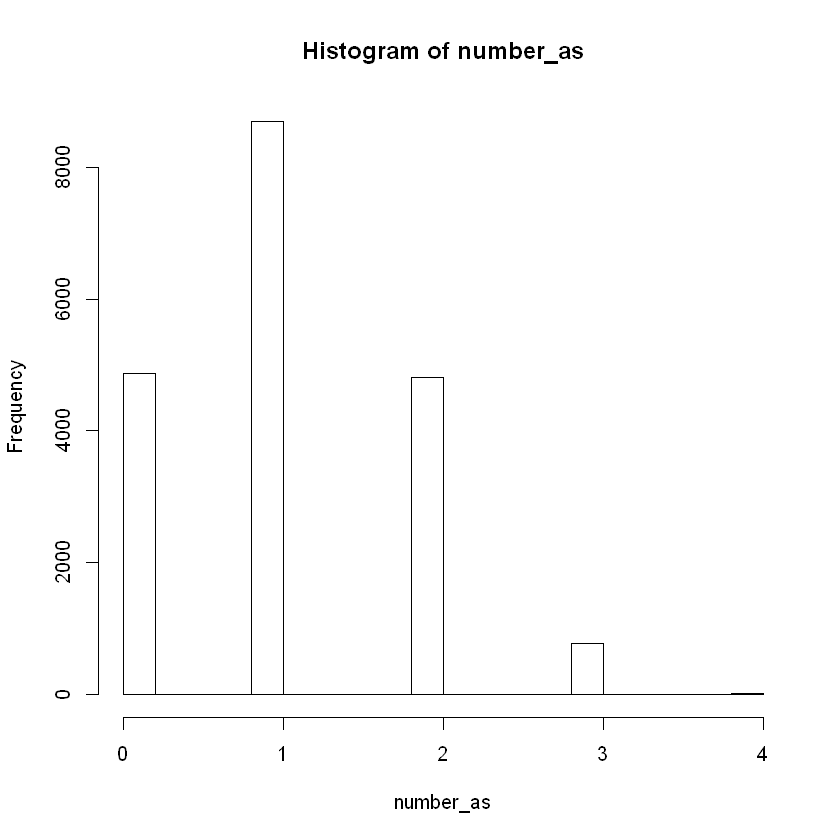

[1] "Aaradhana"

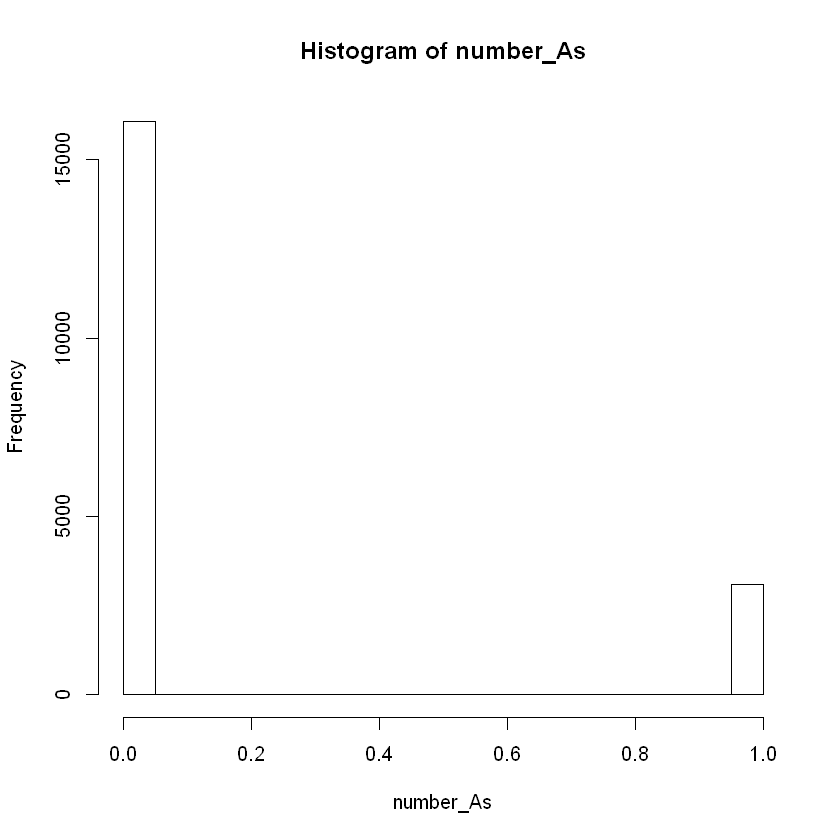

In [11]:
# Count occurrences of "a" in girl_names
number_as <- str_count(girl_names, "a")

# Count occurrences of "A" in girl_names
number_As <- str_count(girl_names, "A")

# Histograms of number_as and number_As
hist(number_as)
hist(number_As)

# Find total "a" + "A"
total_as <- number_as + number_As

# girl_names with more than 4 a's
girl_names[total_as > 4]


### Parsing strings into variables
A common use for str_split() is to pull apart raw string data into more useful variables. In this exercise you'll start by pulling apart a date range, something like "23.01.2017 - 29.01.2017", into separate variables for the start of the range, "23.01.2017", and the end of the range, "29.01.2017".

Remember, if the simplify argument is FALSE (the default) you'll get back a list of the same length as that of the input vector. More commonly, you'll want to pull out the first piece (or second piece etc.) from every element, which is easier if you specify simplify = TRUE and get a matrix as output. You'll explore both of these output types in this exercise.

In [12]:
# Split date_ranges using " - " as a pattern, assign this to split_dates. 
# Don't forget to wrap the pattern in fixed(). Print split_dates. The result is a list with two elements, 
# since date_ranges was a vector of length two.

# Some date data
date_ranges <- c("23.01.2017 - 29.01.2017", "30.01.2017 - 06.02.2017")

# Split dates using " - "
split_dates <- str_split(date_ranges, " - ")
split_dates

[[1]]
[1] "23.01.2017" "29.01.2017"

[[2]]
[1] "30.01.2017" "06.02.2017"

In [13]:
# Now, split date_ranges again, but specify simplify = TRUE and n = 2. Print the result to see the difference. 
# Now we get a matrix back, where each row corresponds to an element of date_ranges.

# Some date data
date_ranges <- c("23.01.2017 - 29.01.2017", "30.01.2017 - 06.02.2017")

# Split dates with n and simplify specified
split_dates_n <- str_split(date_ranges, " - ", n = 2, simplify = TRUE)
split_dates_n

23.01.2017,29.01.2017
30.01.2017,06.02.2017


In [14]:
# Pull out the first column of split_dates_n into start_dates.
# Split start_dates into its day, month and year components. You are aiming for a three column matrix as the result.

# From previous step
date_ranges <- c("23.01.2017 - 29.01.2017", "30.01.2017 - 06.02.2017")
split_dates_n <- str_split(date_ranges, fixed(" - "), n = 2, simplify = TRUE)

# Subset split_dates_n into start_dates and end_dates
start_dates <- split_dates_n[, 1]

# Split start_dates into day, month and year pieces
str_split(start_dates, fixed("."), n = 3, simplify = TRUE)

23,01,2017
30,01,2017


In [16]:
# Now you're on your own. We've provided the both_names vector, listing a couple of famous statisticians. 
# Your job is to pull out the first names and last names into separate vectors. 
# You'll need to use an intermediate variable, both_names_split.

both_names <- c("Box, George", "Cox, David")

# Split both_names into first_names and last_names
both_names_split <- str_split(both_names, ", ", n = 2, simplify = TRUE)

# Get first names
first_names <- both_names_split[, 2]

# Get last names
last_names <- both_names_split[, 1]

# paste first names with last names
names <- paste(first_names, last_names)
names

[1] "George Box" "David Cox"

### Some simple text statistics
Generally, specifying simplify = TRUE will give you output that is easier to work with, but you'll always get n pieces (even if some are empty, "").

Sometimes, you want to know how many pieces a string can be split into, or you want to do something with every piece before moving to a simpler structure. This is a situation where you don't want to simplify and you'll have to process the output with something like lapply().

As an example, you'll be performing some simple text statistics on your lines from Alice's Adventures in Wonderland from Chapter 1. Your goal will be to calculate how many words are in each line, and the average length of words in each line.

To do these calculations, you'll need to split the lines into words. One way to break a sentence into words is to split on an empty space " ". This is a little naive because, for example, it wouldn't pick up words separated by a newline escape sequence like in "two\nwords", but since this situation doesn't occur in your lines, it will do.

In [21]:
lines =  c("The table was a large one, but the three were all crowded together at one corner of it:",                                   
              "\"No room! No room!\" they cried out when they saw Alice coming.", 
              "\"There’s plenty of room!\" said Alice indignantly, and she sat down in a large arm-chair at one end of the table.")

# Split lines into words
words <- str_split(lines, "\ ")

# Number of words per line
lapply(words, length)
  
# Number of characters in each word
word_lengths <- lapply(words, str_length)
  
# Average word length per line
lapply(word_lengths, mean)


[[1]]
[1] 18

[[2]]
[1] 12

[[3]]
[1] 21

[[1]]
[1] 3.888889

[[2]]
[1] 4.25

[[3]]
[1] 4.380952

### Replacing to tidy strings
You've seen one common strategy to pull variables out of strings is to split the string based on a pattern. Sometimes, it's easier to just replace the parts you don't want with an empty string "". This is also a common strategy to clean strings up, for example, to remove unwanted punctuation or white space.

In this exercise you'll pull out some numbers by replacing the part of the string that isn't a number, you'll also play with the format of some phone numbers. Pay close attention to the difference between str_replace() and str_replace_all().

In [22]:
# Some IDs
ids <- c("ID#: 192", "ID#: 118", "ID#: 001")

# Replace "ID#: " with ""
id_nums <- str_replace(ids, pattern = "ID#: ", replacement = "")

# Turn id_nums into numbers
id_ints <- as.numeric(id_nums)

In [23]:
# Some (fake) phone numbers
phone_numbers <- c("510-555-0123", "541-555-0167")

# Use str_replace() to replace "-" with " ". Take a close look at the output, are there still some "-"s?
str_replace(phone_numbers, pattern = "-", replacement = " ")

# Use str_replace_all() to replace "-" with " ". Notice the difference, all the "-"s are replaced!
str_replace_all(phone_numbers, pattern = "-", replacement = " ")

# Turn phone numbers into the format xxx.xxx.xxxx
str_replace_all(phone_numbers, pattern = "-", replacement = ".")

[1] "510 555-0123" "541 555-0167"

[1] "510 555 0123" "541 555 0167"

[1] "510.555.0123" "541.555.0167"

### Review
You've covered a lot of stringr functions in this chapter:

1. str_c()
2. str_length()
3. str_sub()
4. str_detect()
5. str_subset()
6. str_count()
7. str_split()
8. str_replace()

As a review we've got a few tasks for you to do with some DNA sequences. We've put three sequences, corresponding to three genes, from the genome of Yersinia pestis – the bacteria that causes bubonic plague – into the vector genes.

Each string represents a gene, each character a particular nucleotide: Adenine, Cytosine, Guanine or Thymine.

In [29]:
genes <- readRDS(file = "dna.rds")
print(genes)

# Find the number of nucleotides in each sequence
str_length(genes)

# Find the number of A's occur in each sequence
str_count(genes, fixed("A"))

# Return the sequences that contain "TTTTTT"

str_subset(genes, fixed("TTTTTT"))

# Replace all the "A"s in the sequences with a "_"
str_replace_all(genes, pattern = fixed("A"), replacement = "_")

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            YPO0001 
   

[1] 441 462 993

[1] 118 117 267

[1] "TTAAGGAACGATCGTACGCATGATAGGGTTTTGCAGTGATATTAGTGTCTCGGTTGACTGGATCTCATCAATAGTCTGGATTTTGTTGATAAGTACCTGCTGCAATGCATCAATGGATTTACACATCACTTTAATAAATATGCTGTAGTGGCCAGTGGTGTAATAGGCCTCAACCACTTCTTCTAAGCTTTCCAATTTTTTCAAGGCGGAAGGGTAATCTTTGGCACTTTTCAAGATTATGCCAATAAAGCAGCAAACGTCGTAACCCAGTTGTTTTGGGTTAACGTGTACACAAGCTGCGGTAATGATCCCTGCTTGCCGCATCTTTTCTACTCTTACATGAATAGTTCCGGGGCTAACAGCGAGGTTTTTGGCTAATTCAGCATAGGGTGTGCGTGCATTTTCCATTAATGCTTTCAGGATGCTGCGATCGAGATTATCGATCTGATAAATTTCACTCAT"

[1] "TT_G_GT___TT__TCC__TCTTTG_CCC___TCTCTGCTGG_TCCTCTGGT_TTTC_TGTTGG_TG_CGTC__TTTCT__T_TTTC_CCC__CCGTTG_GC_CCTTGTGCG_TC__TTGTTG_TCC_GTTTT_TG_TTGC_CCGC_G___GTGTC_T_TTCTG_GCTGCCT___CC__CCGCCCC___GCGT_CTTGGG_T___TC_GGCTTTTGTTGTTCG_TCTGTTCT__T__TGGCTGC__GTT_TC_GGT_G_TCCCCGGC_CC_TG_GTGG_TGTC_CG_TT__CC_C_GGCC_TTC_GCGT__GTTCGTCC__CTCTGGGCC_TG__GT_TTTCTGT_G____CCC_GCTTCTTCT__TTT_TCCGCT___TGTTC_GC__C_T_TTC_GC_CT_CC__GCGT_CTGCC_CTT_TC__CGTT_TGTC_GCC_T"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
[2] "TT__GG__CG_TCGT_CGC_TG_T_GGGTTTTGC_GTG_T_TT_GTGTCTCGGTTG_CTGG_TCTC_TC__T_GTCTGG_TTTTGTTG_T__GT_CCTGCTGC__TGC_TC__TGG_TTT_C_C_TC_CTTT__T___T_TGCTGT_GTGGCC_GTGGTGT__T_GGCCTC__CC_CTTCTTCT__GCTTTCC__TTTTTTC__GGCGG__GGGT__TCTTTGGC_CTTTTC__G_TT_TGCC__T___GC_GC___CGTCGT__CCC_GTTGTTTTGGGTT__CGTGT_C_C__GCTGCGGT__TG_TCCCTGCTTGCCGC_TCTTTTCT_CTCTT_C_TG__T_GTTCCGGGGCT__C_GCG_GGTTTTTGGCT__TTC_GC_T_GGGTGTGCGTGC_TTTTCC_TT__TGCTTTC_GG_TGCTGCG_TCG_G_TT_TCG_TCTG_T___TTTC_CTC_T"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[3] "_TG______C__TTT_TCC_____C__C__C___TC_GCTTCGT____TC_TTCTTTTCCCGCC__TT_G_GC__C__CTTGGCTTG_TCG__GTCC_GGCTCCT_TTTTG_GCCGTGTGGGTG_TGG__CCC__G_T__CCTTTCTGGTTCTG_G___GCGGT_C_GGT____GTT__GTC_TTGCCGG_TTC__CTTTTG__GTTGT_C_TTC_TT_GCG__GTGG___CGT____CCTT_GGGCGTTTTG_TTTTGGTGCTG_CC__GGGGTGT_T_CCC_T_TG___GC_TTGCGCCC_G_TG__G_TCGCCTG_GTGCT_TTC_TTCTGT_T_TGT_G_TC_GTGGG_TTGGG__CGGGTT_TGGGGG_CGGTG__CGT__CCTGGCTT_CCTG___TCG_CTGTT__C__G_TTT_TGC_GCG_TT___G___CTG__GCGGCG_TC_GTGCTG_GTTTGGTGTG__GCCTTTCCTGCCGG_TC_T_TTC_GTTT_TCC_C_GTG___GCCTGCGGGCC_G_TTCCCTG_TTT_G_TGCT___GGCCGTG__CGTGC__TTGCC___G_GTT_GGTGCTGTCTTCCTT_T_GGG_TTGGTGGC___TTGGC_G_TGGTC__TCCC_TG_TGTTCGTGCGCC_G_TT_TG_TG_TTGG_CCTCTCCG_GTGCGG__GGTTTCTCTGG_TT___CGGCG_C_TT_TTGTCTGG__CCC__T_TTGG__G_TGCCTTTG_G_T_TCTTCT_TGGG__TTCGTGTTG_TGCCG__GCTCTT__GCGTC_GTT_GCCCTG_CTGGCG_TG__G_CCGCTTGG__CTGG__TGGC_TC__TC_CTGTTGCGCGGTG___TGCC_C___CT_TCGGGGG_GGT_TTGGTC_GTCCCGCTT_GTG_TGTT_TTGCTGC_G___C__C_T_TTGGTC_GGTGC__TGTGGTGTTTGGGGCCCTG___TC_GCG_G___GTTG_TGGCCTGCTGT__"

### Final challenges
You've mastered using stringr functions on their own, but by combining multiple operations together in sequence you can achieve quite complicated manipulations.

As the final exercise we want to expose you to the power of combining operations. You'll complete two tasks:

1. You'll turn a vector of full names, like "Bruce Wayne", into abbreviated names like "B. Wayne". This requires combining   str_split(), str_sub() and str_c().

2. You'll compare how many boy names end in "ee" compared to girl names. This requires combining str_sub() with str_detect() along with the base function table().

In [30]:
# Define some full names
names <- c("Diana Prince", "Clark Kent")

# Split into first and last names
names_split <- str_split(names, pattern = " ", simplify = TRUE)

# Extract the first letter in the first name
abb_first <-str_sub(names_split[,1], 1, 1)

# Combine the first letter ". " and last name
str_c(abb_first,". ", names_split[,2])

[1] "D. Prince" "C. Kent"

In [33]:
# Use all names in babynames_2014
all_names <- babynames_2014$name

# Get the last two letters of all_names
last_two_letters <- str_sub(all_names,-2,-1)

# Does the name end in "ee"?
ends_in_ee <- str_detect(last_two_letters, "ee")

# Extract rows and "sex" column
sex <- babynames_2014$sex[ends_in_ee]

# Display result as a table
table(sex)

sex
  F   M 
572  84 